In [1]:
%run ../../algorithmeX.ipynb

## [Polyiamonds](https://en.wikipedia.org/wiki/Polyiamond)

Les idées suivantes sont issues du TAOCP de D. Knuth, Vol. 4B, p. 446, ex. 124.

On pave le plan par des triangles équilatéraux de côté $1$.  
Pour tous $(i,j,k)\in \mathbf Z\times \mathbf Z\times\{1,2\}$, on définit le *triangle* $(i,j,k)$ selon le schéma suivant 

![grille](grille.png)

On place l'origine du plan au centre du triangle $(0,0,2)$.

Le triangle $(i,j,2)$ est donc le $\triangle$-triangle dont le centre est $i\times\mathbf u(0)+ j\times \mathbf u(\pi/3)$ où $\mathbf u(\theta)$ désigne le vecteur unitaire qui fait l'angle $\theta$ avec le premier vecteur de la base canonique, et $(i,j,1)$ est le $\bigtriangledown$-triangle situé immédiatement à droite de $(i,j,2)$.

Les principes sont les mêmes que pour les [polyominos](../puzzles-carres/puzzles-carres.ipynb).

Ici, il y a 6 isométries du triangle auxquelles il faut ajouter les isométries qui échangent $\triangle$ et $\bigtriangledown$.

Pour les obtenir, on procède de la manière suivante :

L'application $(i,j,k)\in \mathbf Z^2\times\{1,2\}\mapsto(i,j,k-i-j)\in\{(i',j',k')\in\mathbf Z^3\;|\;i'+j'+k'\in\{1,2\}\}$ est une bijection et on constate (exercice) que les 12 isométries  correspondent aux 6 permutations du triplet $(i',j',k')$ éventuellement composées avec $(i',j',k')\mapsto(1-i',1-j',1-k')$.

In [2]:
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams['toolbar'] = 'None'
import itertools
import random

snsSet3Set2Colors = [(0.5529411764705883, 0.8274509803921568, 0.7803921568627451), (1.0, 1.0, 0.7019607843137254), (0.7450980392156863, 0.7294117647058823, 0.8549019607843137), (0.984313725490196, 0.5019607843137255, 0.4470588235294118), (0.5019607843137255, 0.6941176470588235, 0.8274509803921568), (0.9921568627450981, 0.7058823529411765, 0.3843137254901961), (0.7019607843137254, 0.8705882352941177, 0.4117647058823529), (0.9882352941176471, 0.803921568627451, 0.8980392156862745), (0.8509803921568627, 0.8509803921568627, 0.8509803921568627), (0.7372549019607844, 0.5019607843137255, 0.7411764705882353), (0.8, 0.9215686274509803, 0.7725490196078432), (1.0, 0.9294117647058824, 0.43529411764705883), (0.4, 0.7607843137254902, 0.6470588235294118), (0.9882352941176471, 0.5529411764705883, 0.3843137254901961), (0.5529411764705883, 0.6274509803921569, 0.796078431372549), (0.9058823529411765, 0.5411764705882353, 0.7647058823529411), (0.6509803921568628, 0.8470588235294118, 0.32941176470588235), (1.0, 0.8509803921568627, 0.1843137254901961), (0.8980392156862745, 0.7686274509803922, 0.5803921568627451), (0.7019607843137254, 0.7019607843137254, 0.7019607843137254)]
snsPastelColors = [(0.984313725490196, 0.7058823529411765, 0.6823529411764706), (0.7019607843137254, 0.803921568627451, 0.8901960784313725), (0.8, 0.9215686274509803, 0.7725490196078432), (0.8705882352941177, 0.796078431372549, 0.8941176470588236), (0.996078431372549, 0.8509803921568627, 0.6509803921568628), (1.0, 1.0, 0.8), (0.8980392156862745, 0.8470588235294118, 0.7411764705882353), (0.9921568627450981, 0.8549019607843137, 0.9254901960784314), (0.9490196078431372, 0.9490196078431372, 0.9490196078431372), (0.7019607843137254, 0.8862745098039215, 0.803921568627451), (0.9921568627450981, 0.803921568627451, 0.6745098039215687), (0.796078431372549, 0.8352941176470589, 0.9098039215686274), (0.9568627450980393, 0.792156862745098, 0.8941176470588236), (0.9019607843137255, 0.9607843137254902, 0.788235294117647), (1.0, 0.9490196078431372, 0.6823529411764706), (0.9450980392156862, 0.8862745098039215, 0.8), (0.8, 0.8, 0.8)]
snsTab20Colors = [(0.12156862745098039, 0.4666666666666667, 0.7058823529411765), (0.6823529411764706, 0.7803921568627451, 0.9098039215686274), (1.0, 0.4980392156862745, 0.054901960784313725), (1.0, 0.7333333333333333, 0.47058823529411764), (0.17254901960784313, 0.6274509803921569, 0.17254901960784313), (0.596078431372549, 0.8745098039215686, 0.5411764705882353), (0.8392156862745098, 0.15294117647058825, 0.1568627450980392), (1.0, 0.596078431372549, 0.5882352941176471), (0.5803921568627451, 0.403921568627451, 0.7411764705882353), (0.7725490196078432, 0.6901960784313725, 0.8352941176470589), (0.5490196078431373, 0.33725490196078434, 0.29411764705882354), (0.7686274509803922, 0.611764705882353, 0.5803921568627451), (0.8901960784313725, 0.4666666666666667, 0.7607843137254902), (0.9686274509803922, 0.7137254901960784, 0.8235294117647058), (0.4980392156862745, 0.4980392156862745, 0.4980392156862745), (0.7803921568627451, 0.7803921568627451, 0.7803921568627451), (0.7372549019607844, 0.7411764705882353, 0.13333333333333333), (0.8588235294117647, 0.8588235294117647, 0.5529411764705883), (0.09019607843137255, 0.7450980392156863, 0.8117647058823529), (0.6196078431372549, 0.8549019607843137, 0.8980392156862745)]

palette = snsPastelColors

def randomColor(seed = None):
    if seed is not None:
        random.seed(str(seed))
    return random.choice(palette)

In [3]:
class PIECE:

    # une piece est un ensemble (frozenset) de triplets (i,j,k), k = 1, 2
    def __init__(self,nom,piece,couleur = None):
        self.nom = nom
        self.piece = PIECE.normalise(piece)
        self.largeur = max(t[0] for t in self.piece) + 1
        self.hauteur = max(t[1] for t in self.piece) + 1
        self.couleur = couleur
      

    def __hash__(self):
        return hash(self.piece)

    def __eq__(self,q):
        return self.piece == q.piece

    def __str__(self):
        return str((self.nom,self.piece))

    def normalise(piece):
        min_i = min(t[0] for t in piece)
        min_j = min(t[1] for t in piece)
        return frozenset((i - min_i, j - min_j, k) for i, j, k in piece)

    def transposee(self):
        return PIECE(self.nom, frozenset((1 - i, 1 - j, 3 - k) for i, j, k in self.piece))

    def isometriquesMoitie(self): # != isometriquesPlus
        l = []
        for s in itertools.permutations((0,1,2)):
            def sigma(t):
                i, j, k = t
                u = (i, j, k - i - j)
                return (u[s[0]], u[s[1]], k)
            l.append(PIECE(self.nom, frozenset(sigma(t) for t in self.piece))) 
        return list(set(l))
    
    def isometriques(self):
        l1 = self.isometriquesMoitie()
        l2 = self.transposee().isometriquesMoitie()
        return(list(set(l1 + l2)))
        
    def chgeBase(i,j):
        return  i + .5 * j,  .8660254037 * j
    
    def triangle(k):
         aux = 0.288675134594813
         return ((0., -.5, .5), (2. * aux, -aux, -aux)) if k == 2 else ((1., 0., .5), (2. * aux, 2. * aux, -aux))  
    
    def plotTriangle(ax, i, j, k, **kwargs):
        x, y =  PIECE.chgeBase(i,j)
        X, Y = PIECE.triangle(k)
        ax.fill(list(map(lambda u: x + u, X)), list(map(lambda v: y + v, Y)), **kwargs)

    def polygoneOfTriplets(e):
        """e est un ensemble de triplets d'entiers (i,j,k)
        representant une piece non nécessairement normalisée.
        Renvoie une liste de deux tuples pour le dessin de la piece.
        """
        segments = set()
        for i,j,k in e:
            x, y = PIECE.chgeBase(i,j)
            X, Y = PIECE.triangle(k)
            if k == 2:
                if (i, j, 1) not in e: segments.add(((x + X[2], x + X[0]),(y + Y[2],y + Y[0])))
                if (i - 1, j, 1) not in e: segments.add(((x + X[0], x + X[1]),(y + Y[0],y + Y[1])))
                if (i, j - 1, 1) not in e: segments.add(((x + X[1], x + X[2]),(y + Y[1],y + Y[2])))
            else:
                if (i, j, 2) not in e: segments.add(((x + X[1], x + X[2]),(y + Y[1],y + Y[2])))
                if (i + 1, j, 2) not in e: segments.add(((x + X[2], x + X[0]),(y + Y[2],y + Y[0])))
                if (i, j + 1, 2) not in e: segments.add(((x + X[0], x + X[1]),(y + Y[0],y + Y[1])))
        return segments
    
    def plotPolyiamond(ax, e, couleur):
        for s in PIECE.polygoneOfTriplets(e):
            ax.plot(*s, linewidth = 1, color = 'black')
        for i, j, k in e:
            PIECE.plotTriangle(ax, i, j, k,  facecolor = couleur, edgecolor='black', linewidth=.05)
        
    def plot(self):
        
        fig = plt.figure(facecolor='w')
        fig.set_figheight(self.hauteur /2.)
        ax = fig.add_subplot(111)
        ax.axis('off')
        ax.axis('equal')
        ax.set_title(self.nom)
        c = 'white' if self.couleur is None else self.couleur
        PIECE.plotPolyiamond(ax, self.piece, c)

#### Génération des polyiamonds de taille donnée
$N=8$

On calcule une liste $\texttt{polyiamonds}$ telle que, pour $1\leqslant n\leqslant N$, $\texttt{polyiamonds[}n\texttt{]}=$ la liste des polyiamonds de taille $n$.

 1 1-iamonds
 1 2-iamonds
 1 3-iamonds
 3 4-iamonds
 4 5-iamonds
12 6-iamonds
24 7-iamonds
66 8-iamonds


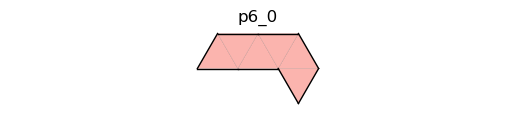

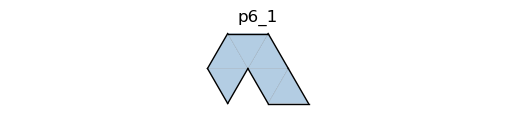

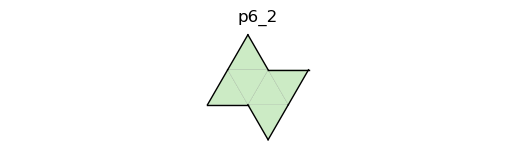

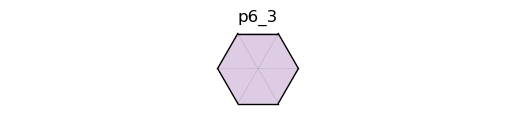

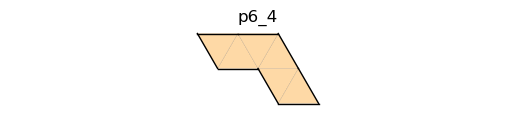

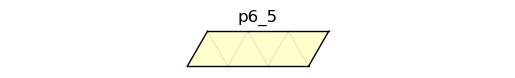

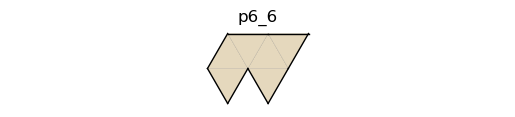

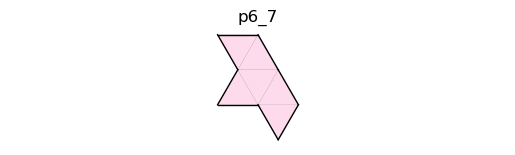

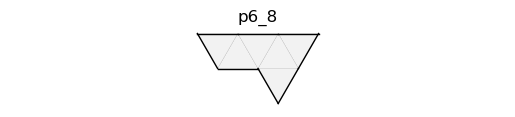

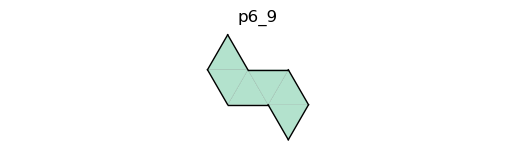

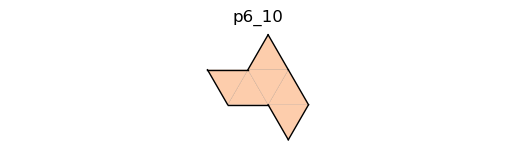

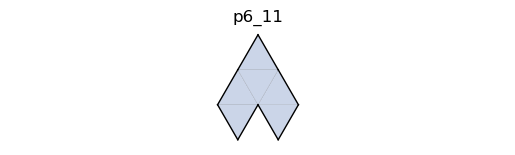

In [11]:
N = 8

def genPolys(p):
    """
    p est l'ensemble des x.piece quand x parcourt l'ensembles des polyiamonds de taille n
    genPolys(p) renvoie  l'ensemble des x.piece quand x parcourt l'ensembles des polyiamonds de taille n + 1
    """
    q = set()
    for piece0 in p:
        for i0,j0,k0 in piece0:
            for i, j, k in [(i0, j0, 1), (i0 - 1, j0, 1), (i0, j0 - 1, 1)] if k0 == 2 \
                      else [(i0, j0, 2), (i0 + 1, j0, 2), (i0, j0 + 1, 2)]:
                if (i, j, k) not in piece0:
                    Piece = PIECE('', piece0 | frozenset([(i, j, k)]))
                    if q.isdisjoint(Piece.isometriques()):
                        q.add(Piece)
    return {x.piece for x in q}

_p = [set(),{frozenset([(0,0,2)])}]
for n in range(N - 1): 
    _p.append(genPolys(_p[-1]))
    
polyiamonds = [[PIECE(f'p{i}_{j}', piece, couleur=palette[j%(len(palette))]) 
                for j, piece in enumerate(sorted(list(e),key = hash))]
                for i, e in enumerate(_p)]

for e in polyiamonds: 
    for p in e: globals()[p.nom] = p    

for n in range(1,N+1):
    print(f'{len(polyiamonds[n]):>2} {n}-iamonds')

# Exemple, les 12 hexiamonds
# Noter que, par ex., p6_3 == polyiamonds[6][3]
for p in polyiamonds[6]: p.plot()


In [35]:

class PUZZLE:

    def __init__(self,pieces,
                      min_i,max_i,min_j,max_j,
                      conditions = None,
                      strict = True):
        """pieces : liste de PIECE
        min_i,max_i,min_j,max_j : definition du plateau
        conditions : couple d'entiers -> booleen restreignant le plateau
    
        1er cas  : strict = True
            Pour chacun des noms des pieces, il faut placer 
            une et une seule piece portant ce nom.
            Les elements de E sont les noms des pieces
            et les cases (triplets d'entiers) du plateau.
            Chaque element de F contient un et un seul nom
            et les cases du plateau utilisees par une piece de ce nom..
        
        2eme cas : strict = False
            Pour chaque piece de pieces, on dispose,
            pour resoudre le puzzle, d'autant d'exemplaires
            que l'on veut de la piece.
            Les elements de E sont les cases du plateau.
        """
        self.min_i = min_i
        self.max_i = max_i
        self.min_j = min_j
        self.max_j = max_j
        self.strict = strict
        self.pieces = pieces
        if not conditions:
            conditions = lambda i,j,k: True
        lignes = dict()
        nbLignes = 0
        for p in pieces:
            for u in range(min_i, max_i - p.largeur + 2):
                for v in range(min_j, max_j - p.hauteur + 2):
                    ligne = [p.nom] if self.strict else []
                    match = True
                    for i,j,k in p.piece:
                        ic, jc = i + u, j + v
                        if conditions(ic,jc,k):
                            ligne.append((ic,jc,k))
                        else:
                            match = False
                            break
                    if match:
                        lignes[nbLignes] = ligne
                        nbLignes += 1
        self.lignes = lignes
        
    def solve(self):
        
        F = self.lignes
        return AlgorithmeX(F).solve()

    def printSolution(self,sol):     
        for l in sol: print(self.lignes[l])

    def plotSolution(self,sol):
                
        fig = plt.figure(facecolor='w')
        ax = fig.add_subplot(111)
        ax.axis('off')
        ax.axis('equal')
        if not self.strict:
            random.seed('314')
        for l in sol:
            e = set()
            for c in self.lignes[l]:
                if type(c) == tuple:
                    e.add(c)
                else:
                    couleur = eval(c).couleur 
            if not self.strict: couleur = randomColor()
            PIECE.plotPolyiamond(ax, e, couleur)

### Exemple

['p6_9', (2, 0, 2), (2, 1, 2), (1, 0, 2), (1, -1, 1), (2, 0, 1), (1, 0, 1)]
['p6_11', (2, 1, 1), (2, 2, 2), (1, 2, 2), (1, 3, 2), (1, 1, 1), (1, 2, 1)]
['p6_10', (-1, 2, 1), (0, 0, 1), (0, 1, 2), (0, 2, 2), (1, 1, 2), (0, 1, 1)]
['p6_4', (2, -2, 1), (2, -1, 2), (1, -2, 2), (2, -2, 2), (1, -2, 1), (2, -1, 1)]
['p6_2', (0, -2, 1), (0, -1, 2), (0, 0, 2), (1, -1, 2), (0, -1, 1), (-1, -1, 1)]
['p6_6', (2, -4, 1), (2, -3, 2), (2, -4, 2), (1, -4, 1), (2, -3, 1), (1, -3, 1)]
['p6_3', (-3, 1, 1), (-3, 2, 2), (-4, 2, 2), (-3, 1, 2), (-4, 1, 1), (-4, 2, 1)]
['p6_1', (-1, 1, 2), (-2, 1, 1), (-2, 2, 2), (-1, 1, 1), (-1, 2, 2), (-3, 2, 1)]
['p6_0', (-3, 3, 2), (-2, 2, 1), (-2, 3, 2), (-4, 3, 2), (-3, 3, 1), (-4, 3, 1)]
['p6_8', (0, 3, 1), (-1, 3, 2), (0, 2, 1), (0, 3, 2), (-1, 3, 1), (-2, 3, 1)]
['p6_5', (-2, -1, 1), (0, -3, 1), (-1, -1, 2), (1, -3, 2), (0, -2, 2), (-1, -2, 1)]
['p6_7', (-1, 0, 2), (-2, 0, 1), (-2, 1, 2), (-1, 0, 1), (-2, 0, 2), (-3, 0, 1)]


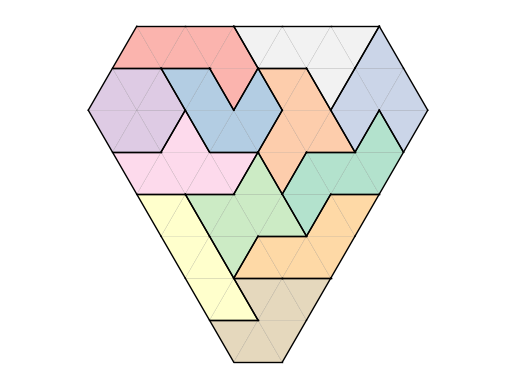

In [43]:
hexiamonds = []
for h in polyiamonds[6]:
    hexiamonds += h.isometriques()

puzzle = PUZZLE(hexiamonds,-4,2,-4,3, conditions = (lambda i,j,k: -4 <= i + j - k <= 2))
    
s = puzzle.solve()
sol = next(s)
puzzle.printSolution(sol)
puzzle.plotSolution(sol)

#### Un octiamond avec les 12 hexiamonds
Possible car $3^2\times 8=72=12\times 6$

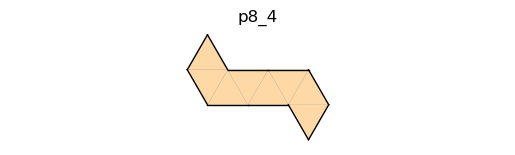

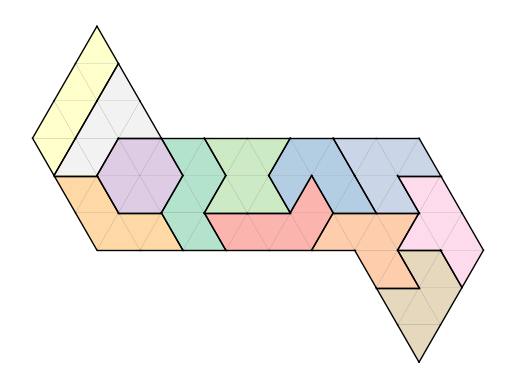

In [50]:
def multiplication(p, polyamond):
    e = []
    for i, j, k in polyamond.piece:
        if k == 2:
            for v in range(p):
                for u in range(p - v):
                    e.append((p * i + u, p * j + v, 2))
                    if u < p - v - 1 : e.append((p * i + u, p * j + v, 1))
        else:
            for v in range(p):
                for u in range(v + 1):
                    e.append((p * i - u + p - 1, p * j + v, 1))
                    if u < v : e.append((p * i - u + p - 1, p * j + v, 2))
    return 0, p * polyamond.largeur, 0, p * polyamond.hauteur, lambda i,j,k: (i, j, k) in e


puzzle = PUZZLE(hexiamonds, *multiplication(3, p8_4))
s = puzzle.solve()
sol = next(s)
p8_4.plot()
puzzle.plotSolution(sol)

#### Un parallélogramme avec les 66 octiamonds

$66\times 8=528=12\times 22\times 2$

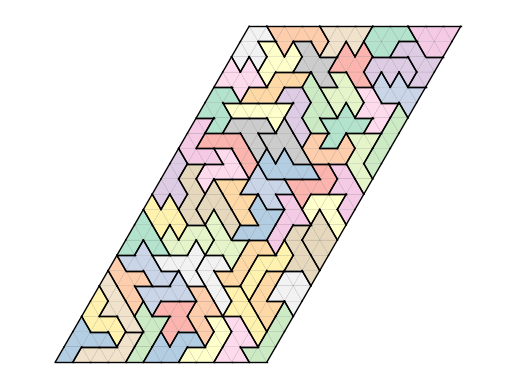

In [54]:
octiamonds = []
for h in polyiamonds[8]:
    octiamonds += h.isometriques()

puzzle = PUZZLE(octiamonds, 1, 12, 1, 22)
s = puzzle.solve()
sol = next(s)
puzzle.plotSolution(sol)
